### Introductory Machine Learning Class assignment and Learning Credit Information

In [229]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
import seaborn as sns 


#### [Problem 1] Confirmation of competition contents

#### What to learn and what to predict?
 - study clients data and predict who are able to repay back loans
#### What kind of file to create and submit to Kaggle?
 - Each  file should contain a header of ```SK_ID_CURR``` and ```TARGET```

#### What kind of index value will be used to evaluate the submissions?
 - ```SK_ID_CURR``` and ```TARGET```

#### [Problem 2] Learning and verification

In [230]:
train = pd.read_csv("/home/jules/projects/dic/mldocs/application_train.csv")
test = pd.read_csv("/home/jules/projects/dic/mldocs/application_test.csv")

print ('Training data Shape: ', train.shape)
print ('Testing data Shape: ', test.shape)
train.head()

Training data Shape:  (307511, 122)
Testing data Shape:  (48744, 121)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [231]:
#checking missing data and drop column with over 10% of missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
data


,Total,Percent
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


In [232]:
features= data[data.Percent < 0.1]
features

,Total,Percent
NAME_TYPE_SUITE,1292,0.004201
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.003320
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.003320
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.003320
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.003320
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


In [233]:
features.index

Index(['NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'CNT_CHILDREN', 'FLAG_DOCUMENT_8', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'AMT_CREDIT',
       'AMT_INCOME_TOTAL', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_WORK_CITY', 'TARGET', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_

In [234]:
train = train[features.index]
train.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR
0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,...,-2120,-3648.0,-637,-9461,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,100002
1,Family,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,...,-291,-1186.0,-1188,-16765,0.003541,House / apartment,Married,Higher education,State servant,100003
2,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,...,-2531,-4260.0,-225,-19046,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,100004
3,Unaccompanied,2.0,0.0,2.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,...,-2437,-9833.0,-3039,-19005,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,100006
4,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,...,-3458,-4311.0,-3038,-19932,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,100007


In [235]:
total_test = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
data_test = pd.concat([total_test,percent], axis=1, keys=['Total','Percent'])
data_test

,Total,Percent
COMMONAREA_AVG,33495,0.687161
COMMONAREA_MODE,33495,0.687161
COMMONAREA_MEDI,33495,0.687161
NONLIVINGAPARTMENTS_AVG,33347,0.684125
NONLIVINGAPARTMENTS_MODE,33347,0.684125
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


In [236]:
test_features= data_test[data_test.Percent <0.1]
test_features.shape

(64, 2)

In [237]:
test = test[test_features.index]
test.head()

,NAME_TYPE_SUITE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_ANNUITY,EXT_SOURCE_2,FLAG_DOCUMENT_21,FLAG_DOCUMENT_20,CODE_GENDER,...,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR
0,Unaccompanied,0.0,0.0,0.0,0.0,20560.5,0.789654,0,0,F,...,-812,-5170.0,-2329,-19241,0.018850,House / apartment,Married,Higher education,Working,100001
1,Unaccompanied,0.0,0.0,0.0,0.0,17370.0,0.291656,0,0,M,...,-1623,-9118.0,-4469,-18064,0.035792,House / apartment,Married,Secondary / secondary special,Working,100005
2,NaN,0.0,0.0,0.0,0.0,69777.0,0.699787,0,0,M,...,-3503,-2175.0,-4458,-20038,0.019101,House / apartment,Married,Higher education,Working,100013
3,Unaccompanied,0.0,0.0,0.0,0.0,49018.5,0.509677,0,0,F,...,-4208,-2000.0,-1866,-13976,0.026392,House / apartment,Married,Secondary / secondary special,Working,100028
4,Unaccompanied,0.0,0.0,0.0,0.0,32067.0,0.425687,0,0,M,...,-4262,-4000.0,-2191,-13040,0.010032,House / apartment,Married,Secondary / secondary special,Working,100038


In [238]:
# No of samples of each label
train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

0: loan repaid on time, 1:loan unpaid


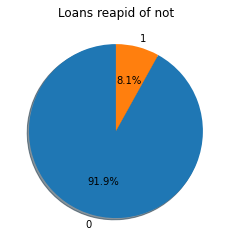

In [239]:
print("0: loan repaid on time, 1:loan unpaid")
plt.pie(train["TARGET"].value_counts(), labels=['0','1'],autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Loans reapid of not")
plt.show()

In [240]:
# summary of datatypes and un-null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_TYPE_SUITE              306219 non-null  object 
 1   OBS_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 2   DEF_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 3   OBS_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 4   DEF_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 5   EXT_SOURCE_2                 306851 non-null  float64
 6   AMT_GOODS_PRICE              307233 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   CNT_FAM_MEMBERS              307509 non-null  float64
 9   DAYS_LAST_PHONE_CHANGE       307510 non-null  float64
 10  CNT_CHILDREN                 307511 non-null  int64  
 11  FLAG_DOCUMENT_8              307511 non-null  int64  
 12  NAME_CONTRACT_TYPE           307511 non-null  object 
 13 

In [241]:
# data with object datatype
objects = train.select_dtypes(include=[object])
objects

,NAME_TYPE_SUITE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE
0,Unaccompanied,Cash loans,M,N,Y,WEDNESDAY,Business Entity Type 3,House / apartment,Single / not married,Secondary / secondary special,Working
1,Family,Cash loans,F,N,N,MONDAY,School,House / apartment,Married,Higher education,State servant
2,Unaccompanied,Revolving loans,M,Y,Y,MONDAY,Government,House / apartment,Single / not married,Secondary / secondary special,Working
3,Unaccompanied,Cash loans,F,N,Y,WEDNESDAY,Business Entity Type 3,House / apartment,Civil marriage,Secondary / secondary special,Working
4,Unaccompanied,Cash loans,M,N,Y,THURSDAY,Religion,House / apartment,Single / not married,Secondary / secondary special,Working
...,...,...,...,...,...,...,...,...,...,...,...
307506,Unaccompanied,Cash loans,M,N,N,THURSDAY,Services,With parents,Separated,Secondary / secondary special,Working
307507,Unaccompanied,Cash loans,F,N,Y,MONDAY,XNA,House / apartment,Widow,Secondary / secondary special,Pensioner
307508,Unaccompanied,Cash loans,F,N,Y,THURSDAY,School,House / apartment,Separated,Higher education,Working
307509,Unaccompanied,Cash loans,F,N,Y,WEDNESDAY,Business Entity Type 1,House / apartment,Married,Secondary / secondary special,Commercial associate


In [242]:
objects.isna().sum()


NAME_TYPE_SUITE               1292
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
WEEKDAY_APPR_PROCESS_START       0
ORGANIZATION_TYPE                0
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
dtype: int64

In [243]:
train['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [244]:
train['NAME_TYPE_SUITE'].isna().sum()

1292

In [245]:
test['NAME_TYPE_SUITE'].isna().sum()

911

In [246]:
train['NAME_TYPE_SUITE'] = train['NAME_TYPE_SUITE'].fillna('Unaccompanied')
test['NAME_TYPE_SUITE'] = test['NAME_TYPE_SUITE'].fillna('Unaccompanied')

objects = train.select_dtypes(include=[object])
objects.isna().sum()

NAME_TYPE_SUITE               0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
NAME_HOUSING_TYPE             0
NAME_FAMILY_STATUS            0
NAME_EDUCATION_TYPE           0
NAME_INCOME_TYPE              0
dtype: int64

In [247]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

objects = train.dtypes[train.dtypes == "object"].index
objects

Index(['NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE',
       'NAME_INCOME_TYPE'],
      dtype='object')

In [248]:
for i in objects:
    train[i]= le.fit_transform(train[i])
    test[i]= le.fit_transform(test[i])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_TYPE_SUITE              307511 non-null  int64  
 1   OBS_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 2   DEF_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 3   OBS_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 4   DEF_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 5   EXT_SOURCE_2                 306851 non-null  float64
 6   AMT_GOODS_PRICE              307233 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   CNT_FAM_MEMBERS              307509 non-null  float64
 9   DAYS_LAST_PHONE_CHANGE       307510 non-null  float64
 10  CNT_CHILDREN                 307511 non-null  int64  
 11  FLAG_DOCUMENT_8              307511 non-null  int64  
 12  NAME_CONTRACT_TYPE           307511 non-null  int64  
 13 

In [249]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NAME_TYPE_SUITE              48744 non-null  int64  
 1   DEF_30_CNT_SOCIAL_CIRCLE     48715 non-null  float64
 2   OBS_30_CNT_SOCIAL_CIRCLE     48715 non-null  float64
 3   OBS_60_CNT_SOCIAL_CIRCLE     48715 non-null  float64
 4   DEF_60_CNT_SOCIAL_CIRCLE     48715 non-null  float64
 5   AMT_ANNUITY                  48720 non-null  float64
 6   EXT_SOURCE_2                 48736 non-null  float64
 7   FLAG_DOCUMENT_21             48744 non-null  int64  
 8   FLAG_DOCUMENT_20             48744 non-null  int64  
 9   CODE_GENDER                  48744 non-null  int64  
 10  FLAG_OWN_CAR                 48744 non-null  int64  
 11  FLAG_OWN_REALTY              48744 non-null  int64  
 12  CNT_CHILDREN                 48744 non-null  int64  
 13  DAYS_LAST_PHONE_

#### Data cleaning


In [250]:
train.isnull().any(axis=0).sum()

9

In [251]:
#number of rows with missing values
train.isnull().any(axis=1).sum()

1966

In [252]:
variables = train.columns
columns = variables.drop('TARGET')
columns

Index(['NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'CNT_CHILDREN', 'FLAG_DOCUMENT_8', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'AMT_CREDIT',
       'AMT_INCOME_TOTAL', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION',
 

In [253]:
# replacing missing values (nan) by the mean in each column
for c in columns:
    train[c] = train[c].fillna((train[c].mean()))
    test[c] = test[c].fillna((test[c].mean()))

#number of columns with missing values
train.isnull().any(axis=0).sum()


0

In [254]:
#number of rows with missing values
train.isnull().any(axis=1).sum()

0

In [255]:
train.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR
0,6,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,...,-2120,-3648.0,-637,-9461,0.018801,1,3,4,7,100002
1,1,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,...,-291,-1186.0,-1188,-16765,0.003541,1,1,1,4,100003
2,6,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,...,-2531,-4260.0,-225,-19046,0.010032,1,3,4,7,100004
3,6,2.0,0.0,2.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,...,-2437,-9833.0,-3039,-19005,0.008019,1,0,4,7,100006
4,6,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,...,-3458,-4311.0,-3038,-19932,0.028663,1,3,4,7,100007


#### leaning

In [256]:
x = train.drop(['TARGET'],axis=1)
y = train[['TARGET']]
x.shape,y.shape


((307511, 64), (307511, 1))

In [257]:
x.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR
0,6,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,...,-2120,-3648.0,-637,-9461,0.018801,1,3,4,7,100002
1,1,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,...,-291,-1186.0,-1188,-16765,0.003541,1,1,1,4,100003
2,6,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,...,-2531,-4260.0,-225,-19046,0.010032,1,3,4,7,100004
3,6,2.0,0.0,2.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,...,-2437,-9833.0,-3039,-19005,0.008019,1,0,4,7,100006
4,6,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,...,-3458,-4311.0,-3038,-19932,0.028663,1,3,4,7,100007


#### Splitting and Standardizing data

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



#### learning  and estimation

In [259]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_predis_dt = dt.predict(X_test)

In [260]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
y_predis_log= log.predict(X_test)


In [261]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_predis_rf = rf.predict(X_test)

#### Evaluation

In [262]:
roc_auc_score(y_test, y_predis_dt)

0.5243487790209113

In [263]:
roc_auc_score(y_test, y_predis_log)

0.5004601661013556

In [264]:
roc_auc_score(y_test, y_predis_rf)

0.5003114897585905

#### [Problem 3] Estimate for test data

In [265]:
print('Training data shape: ' ,train.shape)
print('testing data shape: ' ,test.shape)

Training data shape:  (307511, 65)
testing data shape:  (48744, 64)


#### Predicting with Decision Tree

In [266]:
y_predis_dt2 = dt.predict(test)
test['TARGET'] = y_predis_dt2
test.head()

,NAME_TYPE_SUITE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_ANNUITY,EXT_SOURCE_2,FLAG_DOCUMENT_21,FLAG_DOCUMENT_20,CODE_GENDER,...,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR,TARGET
0,6,0.0,0.0,0.0,0.0,20560.5,0.789654,0,0,0,...,-5170.0,-2329,-19241,0.018850,1,1,1,6,100001,1
1,6,0.0,0.0,0.0,0.0,17370.0,0.291656,0,0,1,...,-9118.0,-4469,-18064,0.035792,1,1,4,6,100005,1
2,6,0.0,0.0,0.0,0.0,69777.0,0.699787,0,0,1,...,-2175.0,-4458,-20038,0.019101,1,1,1,6,100013,1
3,6,0.0,0.0,0.0,0.0,49018.5,0.509677,0,0,0,...,-2000.0,-1866,-13976,0.026392,1,1,4,6,100028,1
4,6,0.0,0.0,0.0,0.0,32067.0,0.425687,0,0,1,...,-4000.0,-2191,-13040,0.010032,1,1,4,6,100038,1


In [267]:
submission_1 = test.loc[:,('SK_ID_CURR','TARGET')]
submission_1

,SK_ID_CURR,TARGET
0,100001,1
1,100005,1
2,100013,1
3,100028,1
4,100038,1
...,...,...
48739,456221,1
48740,456222,1
48741,456223,1
48742,456224,1


In [268]:
submission_1.to_csv("/home/jules/projects/dic/mldocs/submission_1_jls.csv", index=False)

<img src="submit.png"/>

### [Problem 4] Feature engineering

#### Checking feature importances

In [269]:
imp_features = pd.DataFrame({'Feature': dt.feature_importances_}, index= x.columns).sort_values(by='Feature', ascending=False)
imp_features.head(10)

,Feature
EXT_SOURCE_2,0.096756
DAYS_REGISTRATION,0.073836
DAYS_BIRTH,0.070251
SK_ID_CURR,0.069045
DAYS_ID_PUBLISH,0.067866
DAYS_EMPLOYED,0.061079
AMT_ANNUITY,0.059678
DAYS_LAST_PHONE_CHANGE,0.056030
REGION_POPULATION_RELATIVE,0.046836
AMT_CREDIT,0.042386


In [270]:
important = imp_features.head(10).index
important

Index(['EXT_SOURCE_2', 'DAYS_REGISTRATION', 'DAYS_BIRTH', 'SK_ID_CURR',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'AMT_ANNUITY',
       'DAYS_LAST_PHONE_CHANGE', 'REGION_POPULATION_RELATIVE', 'AMT_CREDIT'],
      dtype='object')

In [271]:
x1 = train[important]
x2 = train[important[0:1]]
x3 = train[important[0:4]]
x4 = train[important[0:6]]
x5 = train[important[0:8]]
x6 = train[important[2:3]]
x7 = train[important[3:4]]
x8 = train[important[4:5]]
x9 = train[important[5:6]]


# Define a fuction to determine the inde value for each feature that was used used
def feature(x, feature):
    X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    dt = tree.DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    y_preds = dt.predict(X_test)

    roc_auc_score(y_test, y_preds)
    print(f'ROC score for {feature} is:{roc_auc_score(y_test,y_preds)}')

In [272]:
feature(x1,'the top 10 features')

ROC score for the top 10 features is:0.5237943525439941


In [273]:
feature(x2,'EXT_SOURCE_2')

ROC score for EXT_SOURCE_2 is:0.5142904825029592


In [274]:
feature(x3,'the top 4 features')

ROC score for the top 4 features is:0.5137588022796336


In [275]:
feature(x4,'the top 6 features')

ROC score for the top 6 features is:0.5255919584720418


In [276]:
feature(x5,'the top 8 features')

ROC score for the top 8 features is:0.5202734808697558


In [277]:
feature(x6,'DAYS_REGISTRATION')

ROC score for DAYS_REGISTRATION is:0.49994526130201977


In [278]:
feature(x7,'DAYS_ID_PUBLISH')

ROC score for DAYS_ID_PUBLISH is:0.49620873262304566


In [279]:
feature(x8,'DAYS_BIRTH')

ROC score for DAYS_BIRTH is:0.5001511235024666


In [280]:
feature(x6,'DAYS_EMPLOYED')

ROC score for DAYS_EMPLOYED is:0.49971704044111737


In [281]:
#making an estimate for the test data of the most accura feature
x1_train,x1_test,y_train, y_test = train_test_split(x1,y,test_size=0.25)

scaler = StandardScaler()
scaler.fit(x1_train)
x1_train = scaler.transform(x1_train)
x1_test = scaler.transform(x1_test)

dt = tree.DecisionTreeClassifier()
dt.fit(x1_train,y_train)

test1 = test[important]

y_preds = dt.predict(test1)

test['TARGET'] = y_preds

submission_2 = test.loc[:,('SK_ID_CURR','TARGET')]
submission_2.to_csv("/home/jules/projects/dic/mldocs/submission_2_jls.csv", index=False)


<img src="submit2.png"/>